# Association Analysis - Apriori Algorithm

In [1]:
# Import your Libraries
import pandas as pd
from pandas import DataFrame
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import apriori
from apriori import getItemSetTransactionList
from apriori import returnItemsWithMinSupport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from apriori import runApriori
from apriori import printResults
from apriori import dataFromFile
from apriori import joinSet
from apriori import subsets
from IPython.display import Image
# Above are the only libraries you can use. Do not make any changes above.
# -10 will be deducted, if you use additional libraries apart from these.

# - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

ScreenShot of the dataset.csv


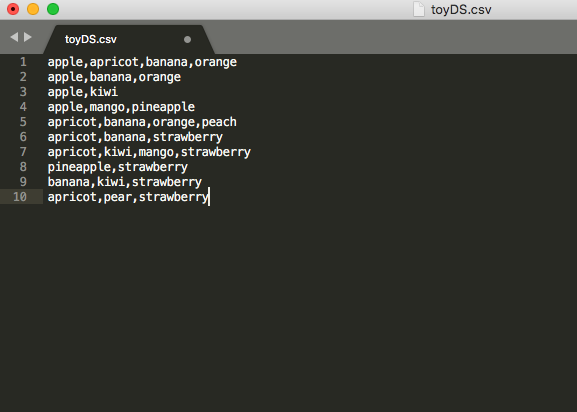

In [2]:
from IPython.display import Image
print ('ScreenShot of the dataset.csv')
Image("SampleScreen01.png")

                                     ########## Task 1 ###########
                                     
--> Before you start, Please modify your dataset '(given dataset).csv' to look like the toyDS.csv.  

--> Export the modified data into new dataset named 'dataset.csv'

--> Read and print first 10 transactions of dataset.csv







In [3]:
########## Code for Task 1 #############

########## Code for Task 1 #############

# Loading the dataset

data = pd.read_csv('dataset_two.csv')
print(data.head(10))

   Juice  Nachos   Tortilla   Cheese  Eggs  Banana  Milk  Bread  Butter
0  Juice     NaN   Tortilla   Cheese  Eggs     NaN  Milk    NaN  Butter
1    NaN     NaN   Tortilla  Cheese   Eggs     NaN   NaN  Bread  Butter
2    NaN  Nachos        NaN      NaN   NaN  Banana  Milk  Bread     NaN
3  Juice  Nachos  Tortilla   Cheese   Eggs  Banana  Milk  Bread  Butter
4  Juice  Nachos        NaN      NaN   NaN     NaN   NaN  Bread     NaN
5  Juice  Nachos  Tortilla    Cheese   NaN  Banana  Milk    NaN  Butter
6  Juice  Nachos        NaN      NaN  Eggs     NaN  Milk  Bread  Butter
7  Juice     NaN   Tortilla      NaN   NaN  Banana   NaN    NaN     NaN
8  Juice     NaN   Tortilla  Cheese   Eggs     NaN  Milk  Bread  Butter
9    NaN  Nachos   Tortilla   Cheese   NaN  Banana   NaN    NaN  Butter


In [4]:

transactions_list = []


for i in range(0,len(data)):
    transactions_list.append([str(data.values[i,j]) for j in range(0,9) if str(data.values[i,j])!='nan'])

                                  ######## Task 2 ########
    
--> In this task, You should be able to execute and print FPgrowth results using mlxtend.

--> "DO NOT USE ANY OTHER LIBRARY !!!".

--> Execute apriori algorithm atleast 3 times for different combinations of support and print the results for the dataset.

--> Please do explain your reasoning for each combinations.





In [5]:
######### Code for Task 2 #############


te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

dataset.head()


res1=fpgrowth(dataset,min_support=0.05, use_colnames=True)


res2=fpgrowth(dataset,min_support=0.04, use_colnames=True)


res3=fpgrowth(dataset,min_support=0.03, use_colnames=True)

print("\nfor min_support = 0.05\n")
print(res1)
print("\nfor min_support = 0.04\n")
print(res2)
print("\nfor min_support = 0.03\n")
print(res3)

# Support denotes how frequently an item will appear in the dataset.
# first I used minimum support value as 0.05 and got 568 itemsets.
# Then I further decreased the minimum support to 0.04 value and got 992 itemsets.
# Later I decreased the minimum support value to 0.03 and got 1051 itemsets.
# increasing the minimum support value directly effect in decreasing number of itemset.



for min_support = 0.05

      support                                 itemsets
0    0.723077                                  (Juice)
1    0.723077                                   (Eggs)
2    0.630769                                   (Milk)
3    0.630769                                 (Butter)
4    0.584615                               (Tortilla)
..        ...                                      ...
563  0.092308         (Juice, Banana, Tortilla , Eggs)
564  0.092308  (Banana, Bread, Tortilla , Eggs, Juice)
565  0.092308               (Juice, Cheese, Tortilla )
566  0.092308              (Cheese, Banana, Tortilla )
567  0.092308       (Juice, Cheese, Banana, Tortilla )

[568 rows x 2 columns]

for min_support = 0.04

      support                                           itemsets
0    0.723077                                            (Juice)
1    0.723077                                             (Eggs)
2    0.630769                                             (Milk)
3    0

                                  ######## Task 3 ########
                                  
--> In this task, You should be able to execute and print apriory results by making use of apriory.py

--> "DO NOT USE ANY OTHER LIBRARY !!!".

--> Execute apriori algorithm atleast 3 times for different combinations of confidence and support and print the results for the dataset.

--> Please do explain your reasoning for each combinations.






In [6]:
########### Code for Task 3 ##############

items,apriori_rules = apriori.runApriori(transactions_list,0.03,0.2)

print(items)
print(apriori_rules)




items,apriori_rules = apriori.runApriori(transactions_list,0.02,0.3)

print(items)
print(apriori_rules)



items,apriori_rules = apriori.runApriori(transactions_list,0.01,0.4)

print(items)
print(apriori_rules)

# When we increase the confidence the item set size is reducing 
# Support denotes how frequently an item will appear in the dataset.
# Confidence will denote how often both the items will occur given the number of times one item occurs.
# Since value of minimum supprot and confidence is Inversely Proportional to number of itemsets. I increased the confidence with decreasing minimum support.




[(('Nachos',), 0.5846153846153846), (('Banana',), 0.676923076923077), (('Cheese ',), 0.18461538461538463), (('Bread',), 0.6307692307692307), (('Nachos ',), 0.046153846153846156), (('Juice',), 0.7230769230769231), (('Cheese',), 0.49230769230769234), (('Milk',), 0.6307692307692307), (('Eggs',), 0.7230769230769231), (('Tortilla ',), 0.13846153846153847), (('Butter',), 0.6307692307692307), (('Tortilla',), 0.5846153846153846), (('Nachos ', 'Banana'), 0.046153846153846156), (('Cheese', 'Tortilla '), 0.09230769230769231), (('Banana', 'Eggs'), 0.49230769230769234), (('Juice', 'Tortilla '), 0.13846153846153847), (('Cheese ', 'Tortilla '), 0.046153846153846156), (('Tortilla', 'Eggs'), 0.49230769230769234), (('Cheese', 'Nachos '), 0.046153846153846156), (('Banana', 'Nachos'), 0.4), (('Milk', 'Bread'), 0.4), (('Butter', 'Banana'), 0.4), (('Milk', 'Cheese '), 0.13846153846153847), (('Bread', 'Banana'), 0.4), (('Juice', 'Milk'), 0.5384615384615384), (('Nachos ', 'Tortilla '), 0.046153846153846156), 